# Avocado Analysis Case Study

## Practice Business Task

As a junior analyst at a mass retail store chain, I have been given the task to analyze data regarding Avocado sales and provide the company with valuable insights and suggestions to make informed business decisions in regards to Avocado stocks at their stores

## Key points regarding the data
* The data has been made available on Kaggle by Justin Kiggins.
* The original source of the data is the Hass Avocado Board.
* The data is limited to sales of avocados in the United States and is further divides into regions.
* The timeframe of the data is from 2015 to 2018 so it is not recent and may not be applicable to current trends in avocado sales.
* It has been shared under the Database: Open Database, Contents: © Original Authors license.

## Data Exploration 

To initiate our analysis, we will first explore the dataset to familiarize ourselves with its characteristics. To begin, import the necessary libraries and load the dataset into a dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
avocado_df = pd.read_csv('data/avocado.csv')

In [3]:
print(avocado_df.head())
print(avocado_df.info())
print(avocado_df.tail())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

We rename the columns for better understanding of what they represent and more consistent formatting

In [4]:
avocado_df = avocado_df.rename(columns={
    'AveragePrice': 'Average Price',
    '4046': 'PLU4046', 
    '4225': 'PLU4225',
    '4770': 'PLU4770',
    'type': 'Type',
    'year': 'Year',
    'region': 'Region',
                       })
print(avocado_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18249 non-null  int64  
 1   Date           18249 non-null  object 
 2   Average Price  18249 non-null  float64
 3   Total Volume   18249 non-null  float64
 4   PLU4046        18249 non-null  float64
 5   PLU4225        18249 non-null  float64
 6   PLU4770        18249 non-null  float64
 7   Total Bags     18249 non-null  float64
 8   Small Bags     18249 non-null  float64
 9   Large Bags     18249 non-null  float64
 10  XLarge Bags    18249 non-null  float64
 11  Type           18249 non-null  object 
 12  Year           18249 non-null  int64  
 13  Region         18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


Organize the data by date to get an idea for the complete duration of the data.

In [5]:
ordered_df = avocado_df.sort_values(by='Date')

In [6]:
print(ordered_df.head())
print(ordered_df.tail())

       Unnamed: 0        Date  Average Price  Total Volume  PLU4046   PLU4225  \
11569          51  2015-01-04           1.75      27365.89  9307.34   3844.81   
9593           51  2015-01-04           1.49      17723.17  1189.35  15628.27   
10009          51  2015-01-04           1.68       2896.72   161.68    206.96   
1819           51  2015-01-04           1.52      54956.80  3013.04  35456.88   
9333           51  2015-01-04           1.64       1505.12     1.27   1129.50   

       PLU4770  Total Bags  Small Bags  Large Bags  XLarge Bags          Type  \
11569   615.28    13598.46    13061.10      537.36          0.0       organic   
9593      0.00      905.55      905.55        0.00          0.0       organic   
10009     0.00     2528.08     2528.08        0.00          0.0       organic   
1819   1561.70    14925.18    11264.80     3660.38          0.0  conventional   
9333      0.00      374.35      186.67      187.68          0.0       organic   

       Year              R

Here we can see that the data starts from 2015-01-04 and ends on 2018-03-25.

## Data cleaning

To ensure that the data we are working with is clean, let us first check for any null values.

In [7]:
print(avocado_df.isnull().sum())

Unnamed: 0       0
Date             0
Average Price    0
Total Volume     0
PLU4046          0
PLU4225          0
PLU4770          0
Total Bags       0
Small Bags       0
Large Bags       0
XLarge Bags      0
Type             0
Year             0
Region           0
dtype: int64


As seen, the data contains no null values. Let us check for the datatypes of each column.

In [8]:
avocado_df.dtypes

Unnamed: 0         int64
Date              object
Average Price    float64
Total Volume     float64
PLU4046          float64
PLU4225          float64
PLU4770          float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
Type              object
Year               int64
Region            object
dtype: object

The datatypes for each field are consistent with what they represent. The data is clean and can be used for analysis. Let us now move forward to the analysis.

## Data Analysis and Visualization

We have tree main categories for analysis: type of avocado, bag size and region.
Let us first consider the average price of avocados.

<Axes: xlabel='Average Price', ylabel='Count'>

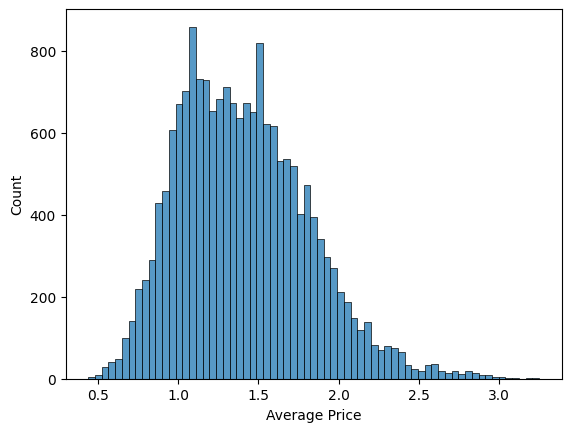

In [9]:
sns.histplot(avocado_df['Average Price'])

As observed,average price lies mostly in the range of 1.0 to 1.5.

Let us calculate average price for both categories.

In [10]:
avg_price = avocado_df.groupby('Date')['Average Price'].mean().reset_index()

# Calculate average prices for conventional and organic avocados
conv_price = avocado_df[avocado_df['Type'] == 'conventional'].groupby('Date')['Average Price'].mean().reset_index()
org_price = avocado_df[avocado_df['Type'] == 'organic'].groupby('Date')['Average Price'].mean().reset_index()
print(conv_price)
print(org_price)

           Date  Average Price
0    2015-01-04       1.009630
1    2015-01-11       1.111296
2    2015-01-18       1.133519
3    2015-01-25       1.115370
4    2015-02-01       0.962037
..          ...            ...
164  2018-02-25       1.141111
165  2018-03-04       1.142407
166  2018-03-11       1.136667
167  2018-03-18       1.096296
168  2018-03-25       1.147222

[169 rows x 2 columns]
           Date  Average Price
0    2015-01-04       1.592963
1    2015-01-11       1.630000
2    2015-01-18       1.648704
3    2015-01-25       1.678889
4    2015-02-01       1.532037
..          ...            ...
164  2018-02-25       1.578148
165  2018-03-04       1.557963
166  2018-03-11       1.533519
167  2018-03-18       1.531111
168  2018-03-25       1.546481

[169 rows x 2 columns]


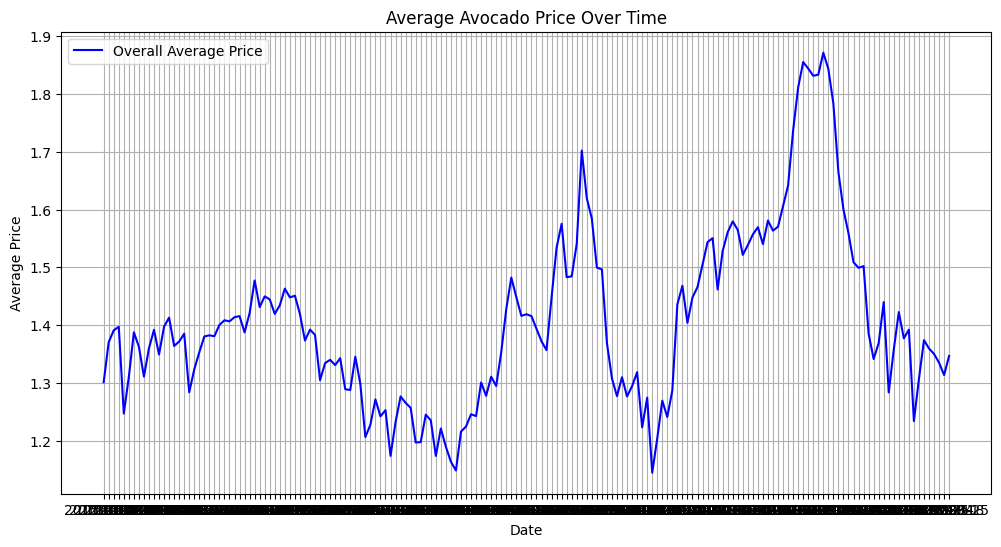

In [11]:
# Plot average price trend
plt.figure(figsize=(12, 6))
plt.plot(avg_price['Date'], avg_price['Average Price'], label='Overall Average Price', color='blue')
plt.title('Average Avocado Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid()
plt.show()

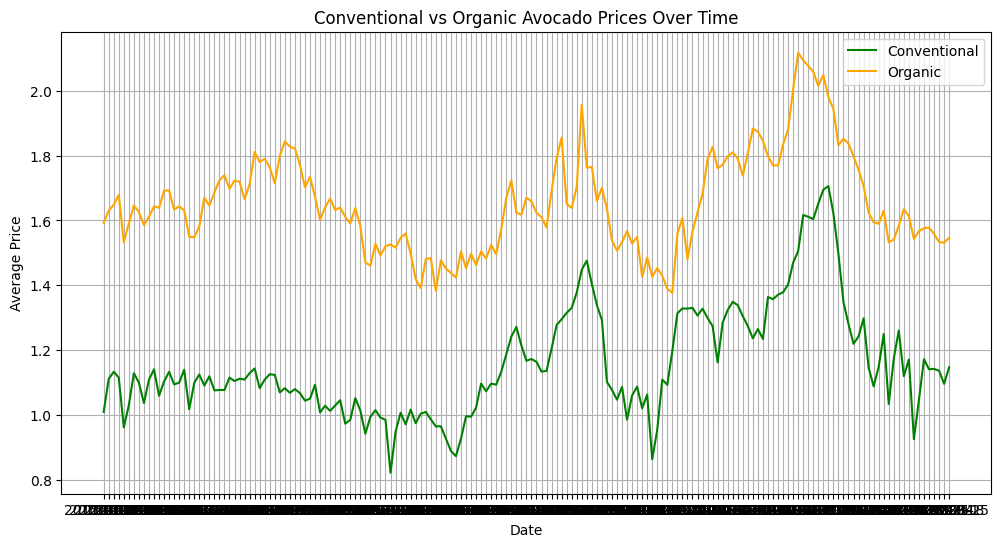

In [12]:
# Plot price trends for conventional and organic avocados
plt.figure(figsize=(12, 6))
plt.plot(conv_price['Date'], conv_price['Average Price'], label='Conventional', color='green')
plt.plot(org_price['Date'], org_price['Average Price'], label='Organic', color='orange')
plt.title('Conventional vs Organic Avocado Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid()
plt.show()

While this approach is useful for finding trends, the date label gets confusing. Let use look at a pie chart for a better understanding.

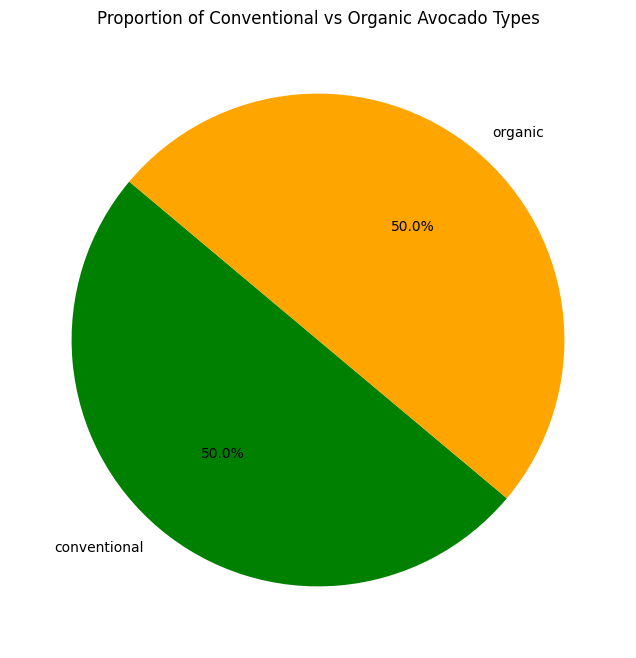

In [13]:
# Calculate counts for each avocado type
type_counts = avocado_df['Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange'])
plt.title('Proportion of Conventional vs Organic Avocado Types')
plt.show()

For a more generalized understanding of the trends in average price, let us see how it shifts through the years.

In [14]:
# Group by the existing Year column and calculate the average price
avg_price_by_year = avocado_df.groupby('Year')['Average Price'].mean().reset_index()

print(avg_price_by_year)

   Year  Average Price
0  2015       1.375590
1  2016       1.338640
2  2017       1.515128
3  2018       1.347531


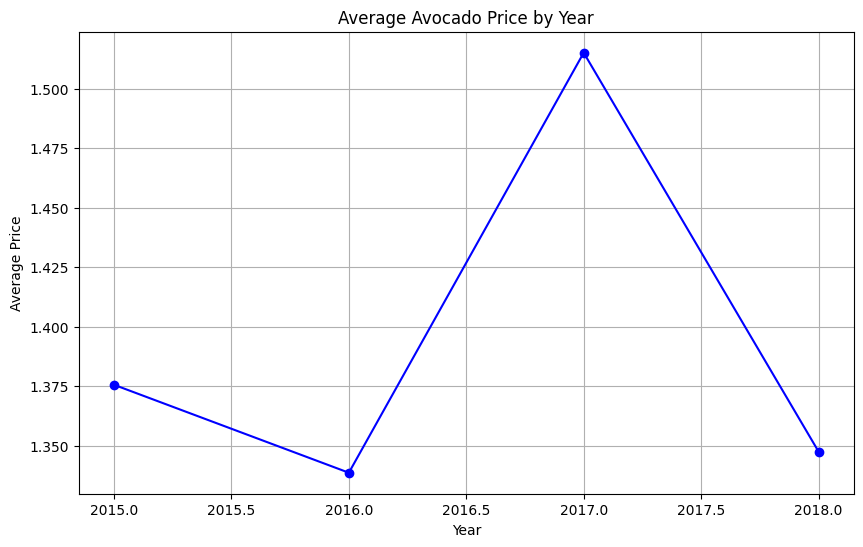

In [15]:
# Plot the average price by year
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year['Year'], avg_price_by_year['Average Price'], marker='o', color='blue')
plt.title('Average Avocado Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid()
plt.show()

Now, let us perform a similar analysis for each type of avocado. Once again here we make use of a pie chart to better understand the proportion of sales for each of these types of avocados.

In [16]:
# Calculate total sales volume for each PLU type
total_sales = avocado_df[['PLU4046', 'PLU4225', 'PLU4770']].sum()

print(total_sales)

PLU4046    5.347111e+09
PLU4225    5.386276e+09
PLU4770    4.168023e+08
dtype: float64


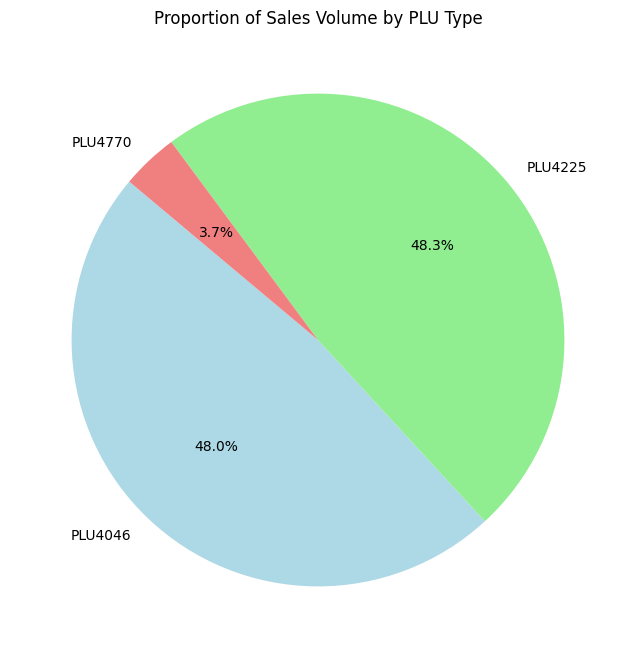

In [17]:
# Plot pie chart for total sales volume
plt.figure(figsize=(8, 8))
plt.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Sales Volume by PLU Type')
plt.show()

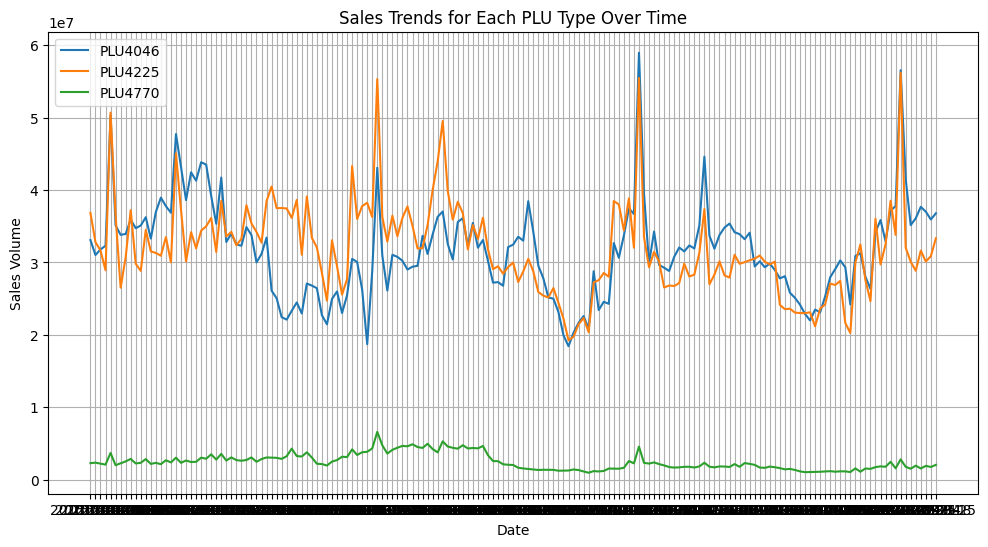

In [18]:
# Group sales volumes by Date and sum up for each PLU type
sales_trends = avocado_df.groupby('Date')[['PLU4046', 'PLU4225', 'PLU4770']].sum()

# Plot sales trends for each PLU type
plt.figure(figsize=(12, 6))
for column in sales_trends.columns:
    plt.plot(sales_trends.index, sales_trends[column], label=column)

plt.title('Sales Trends for Each PLU Type Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid()
plt.show()

In [19]:
# Group by Year and sum sales volumes for each PLU type
yearly_sales = avocado_df.groupby('Year')[['PLU4046', 'PLU4225', 'PLU4770']].sum()

print(yearly_sales)


           PLU4046       PLU4225       PLU4770
Year                                          
2015  1.709450e+09  1.761054e+09  1.427724e+08
2016  1.525123e+09  1.672728e+09  1.598798e+08
2017  1.652038e+09  1.544735e+09  9.121751e+07
2018  4.604997e+08  4.077587e+08  2.293259e+07


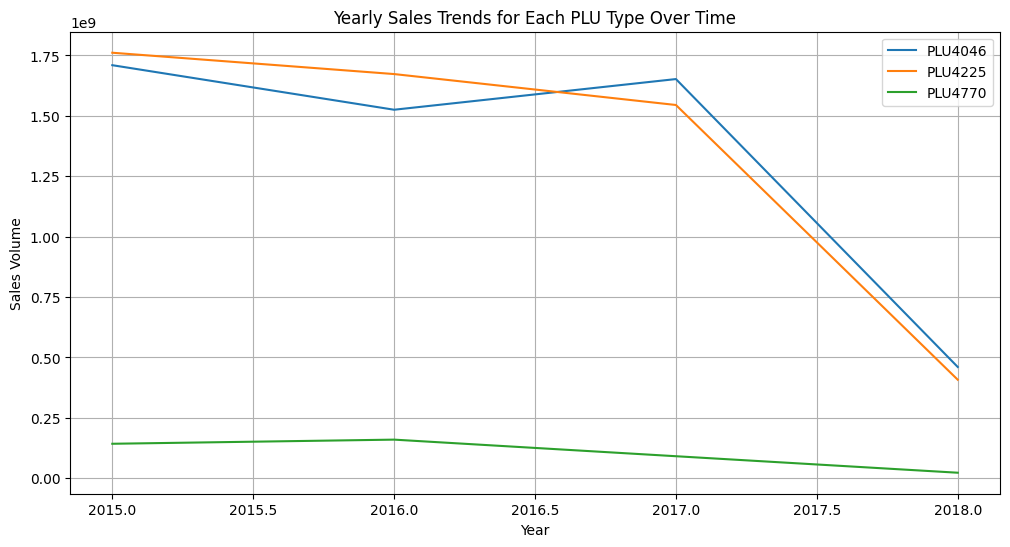

In [20]:
# Plot sales trends for each PLU type
plt.figure(figsize=(12, 6))
for column in yearly_sales.columns:
    plt.plot(yearly_sales.index, yearly_sales[column], label=column)

plt.title('Yearly Sales Trends for Each PLU Type Over Time')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid()
plt.show()

Let us now see the top 10 regions where sales are the highest.

In [21]:

# Exclude the 'TotalUS' region
region_sales = avocado_df[avocado_df['Region'] != 'TotalUS'].groupby('Region')['Total Volume'].sum()

# Sort the regions by total sales volume in descending order and get the top 10
top_10_regions = region_sales.sort_values(ascending=False).head(10)

# Display the top 10 regions
print(top_10_regions)

Region
West            1.086779e+09
California      1.028982e+09
SouthCentral    1.011280e+09
Northeast       7.132809e+08
Southeast       6.152384e+08
GreatLakes      5.896425e+08
Midsouth        5.083494e+08
LosAngeles      5.078965e+08
Plains          3.111885e+08
NewYork         2.407341e+08
Name: Total Volume, dtype: float64


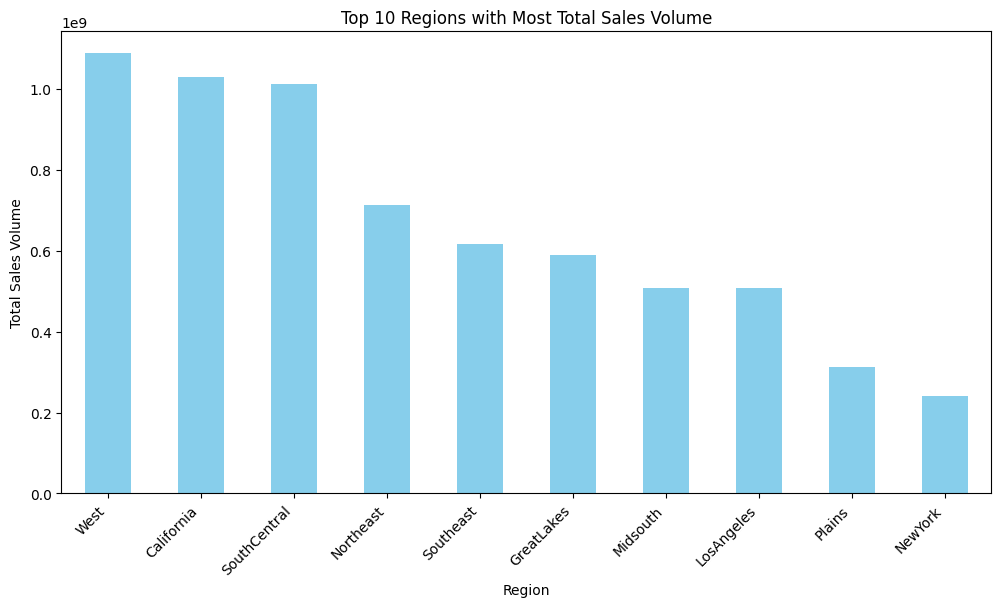

In [22]:
# Plot the top 10 regions with most total volume
plt.figure(figsize=(12, 6))
top_10_regions.plot(kind='bar', color='skyblue')
plt.title('Top 10 Regions with Most Total Sales Volume')
plt.xlabel('Region')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45, ha='right')
plt.show()

Avocado sales can vary according to the time of the year. Let us look at which months would have the highest sales.

In [23]:
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])
avocado_df['Month'] = avocado_df['Date'].dt.month
monthly_sales = avocado_df.groupby('Month')['Total Volume'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by='Total Volume', ascending=False)
monthly_sales = monthly_sales.sort_values(by='Month')


print(monthly_sales)

    Month  Total Volume
0       1  1.756531e+09
1       2  1.760529e+09
2       3  1.623952e+09
3       4  1.235792e+09
4       5  1.470745e+09
5       6  1.202566e+09
6       7  1.298881e+09
7       8  1.128375e+09
8       9  9.763016e+08
9      10  1.028756e+09
10     11  9.541687e+08
11     12  1.086807e+09


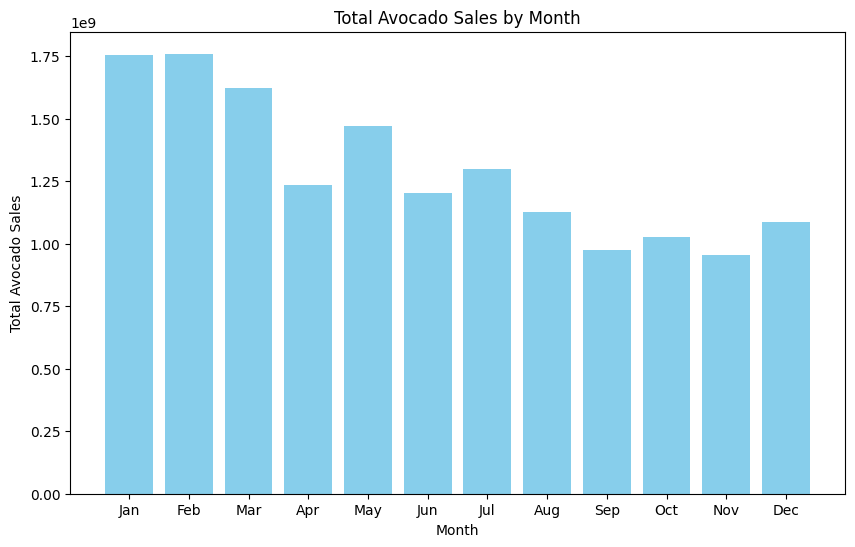

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['Total Volume'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Avocado Sales')
plt.title('Total Avocado Sales by Month')
plt.xticks(monthly_sales['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Let us also create a pie chart for better visualization.

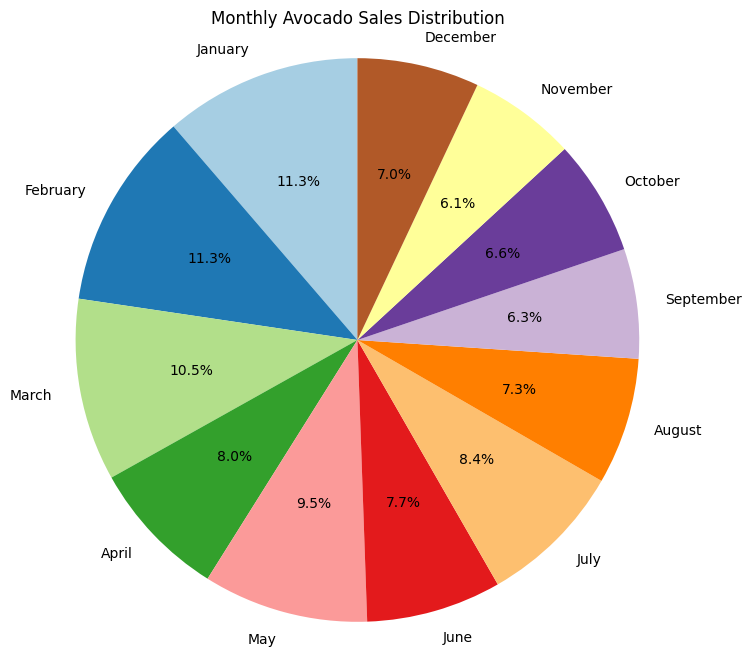

In [25]:
monthly_sales['Month Name'] = monthly_sales['Month'].apply(lambda x: calendar.month_name[x])
# Data for the pie chart
labels = monthly_sales['Month Name']
sizes = monthly_sales['Total Volume']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors
)
plt.title('Monthly Avocado Sales Distribution')
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.show()

And finally, we perform the same analysis for bag size of the avocados.

In [26]:
non_zero_xlarge_bags = avocado_df['XLarge Bags'][avocado_df['XLarge Bags'] != 0].count()
print("Number of values in XLarge Bags: ", avocado_df['XLarge Bags'].count())
print("Number of non-zero values in XLarge Bags:", non_zero_xlarge_bags)

# Count non-zero values in "Small Bags"
non_zero_small_bags = avocado_df['Small Bags'][avocado_df['Small Bags'] != 0].count()
print("Number of values in Small Bags: ", avocado_df['Small Bags'].count())
print("Number of non-zero values in Small Bags:", non_zero_small_bags)

# Count non-zero values in "Large Bags"
non_zero_large_bags = avocado_df['Large Bags'][avocado_df['Large Bags'] != 0].count()
print("Number of values in Large Bags: ", avocado_df['Large Bags'].count())
print("Number of non-zero values in Large Bags:", non_zero_large_bags)

Number of values in XLarge Bags:  18249
Number of non-zero values in XLarge Bags: 6201
Number of values in Small Bags:  18249
Number of non-zero values in Small Bags: 18090
Number of values in Large Bags:  18249
Number of non-zero values in Large Bags: 15879


In [27]:
# Calculate total sales volume for each bag size
bag_sales = avocado_df[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()

print(bag_sales)


Small Bags     3.324871e+09
Large Bags     9.916158e+08
XLarge Bags    5.668918e+07
dtype: float64


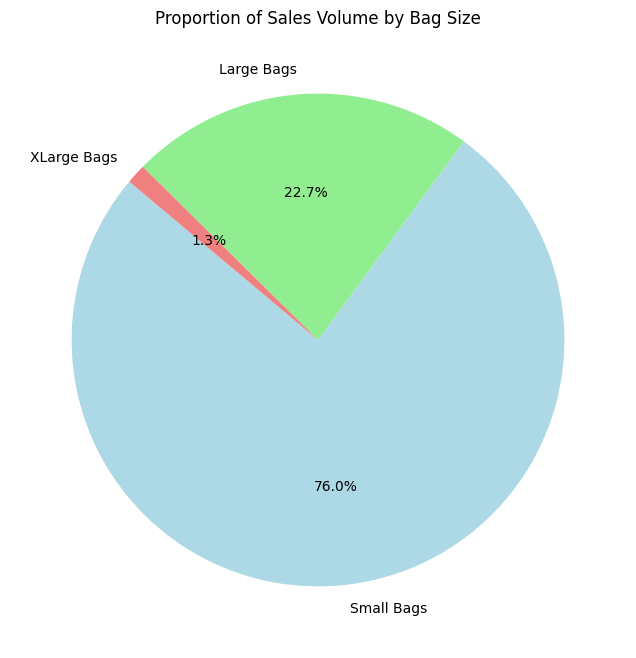

In [28]:
# Plot pie chart for bag size proportions
plt.figure(figsize=(8, 8))
plt.pie(bag_sales, labels=bag_sales.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Sales Volume by Bag Size')
plt.show()

## Observations
* People do not have a preference for the way in which avocados are grown i.e., if they are grown by conventional methods or by organic means.
* The Average Price of avocados sold shows no significant trends. They reached an all time high in the year 2017 but dipped again in later years.
* People show a similar preference to the PLU4225 and PLU4046 varieties of avocados. However, the PLU4770 variety has a very low preference of only 3.7%.
* Sales are highest in the months of January, February and March adding up to 33.1% of total sales.
* Majority of sales made are made in the form of small bags.

## Conclusion
* Based on these observations, a good sales suggestion would be to pre-package small bags of avocados. This will make shopping more convenient for customers.
* Sales are higher at the start of the year. This might indicate that people shart consuming avocados more as a healthy new years resolution. As such, the marketing team can structure adverising campaigns to cater to this group of consumers at the start of a new year. 
* As people have a very low preference for the PLU4770 variety, it can be taken off the shelves in most places and sale should be continued only in the regions where they are sold more if consumers are interested. This would require further analysis.
